In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
%matplotlib inline


In [9]:
sal = pd.read_csv('salaries.csv')

In [10]:
sal.head(5)


,Function,sup1,sup2,sup3,sup4,sup5,salary,gender,disabled,race,...,inst4,inst5,instBudget,City,State,Zip,country,Category,instSize,instType
0,position1,16,1,0,350,135,125000,Woman,False,Caucasian,...,350,120,3100000,Edmonton,AB,T6G 2H9,CANADA,one,35630,Public Institution
1,position3,7,0,0,320,120,92000,Woman,False,Other,...,350,120,3100000,Edmonton,AB,T6G 2H9,CANADA,one,35630,Public Institution
2,position3,4,0,0,25,15,88000,Woman,False,Caucasian,...,350,120,3100000,Edmonton,AB,T6G 2H9,CANADA,one,35630,Public Institution
3,position5,0,0,0,5,0,75000,Woman,False,Caucasian,...,350,120,3100000,Edmonton,AB,T6G 2H9,CANADA,one,35630,Public Institution
4,position18,0,0,0,0,0,67000,Woman,False,Caucasian,...,350,120,3100000,Edmonton,AB,T6G 2H9,CANADA,one,35630,Public Institution


In [11]:
list(sal.columns.values)

['Function',
 'sup1',
 'sup2',
 'sup3',
 'sup4',
 'sup5',
 'salary',
 'gender',
 'disabled',
 'race',
 'yearsInPosition',
 'yearsInProfession',
 'age',
 'cred1',
 'cred2',
 'highestDegree',
 'inst1',
 'inst2',
 'inst3',
 'inst4',
 'inst5',
 'instBudget',
 'City',
 'State',
 'Zip',
 'country',
 'Category',
 'instSize',
 'instType']

In [12]:
sal.mean()

sup1                       1.425292
sup2                       0.737549
sup3                       0.600693
sup4                      49.776527
sup5                       4.090515
salary                 49234.686712
disabled                   0.012993
yearsInPosition            5.690508
yearsInProfession          9.331236
age                       38.257220
cred1                      0.067129
cred2                      0.031615
inst1                     16.575574
inst2                      6.470333
inst3                      3.541793
inst4                    334.433088
inst5                     41.038545
instBudget           4751711.388732
instSize               25066.208858
dtype: float64

In [13]:
sal['missingSalary'] = pd.isnull(sal['salary'])
sal = sal[(sal.missingSalary == False)]

In [14]:
sal["country"] = sal["country"].replace("Canada", "CANADA")

In [15]:
# X is age, y is salary

X_numeric_features = ['sup1', 'sup2', 'sup3', 'sup4', 'sup5', 'disabled', 'yearsInPosition', 
         'yearsInProfession', 'age', 'cred1', 'cred2', 'inst1', 'inst2', 'inst3', 'inst4', 'inst5', 'instBudget', 'instSize']
X_numeric = sal[X_numeric_features]
X_categorical_features = ['Function', 'gender', 'race', 'highestDegree', 'Category', 'instType']
X_categorical = sal[X_categorical_features]





In [16]:
Function_dummies = pd.get_dummies(X_categorical['Function'])
gender_dummies = pd.get_dummies(X_categorical['gender'])
race_dummies = pd.get_dummies(X_categorical['race'])
highestDegree_dummies = pd.get_dummies(X_categorical['highestDegree'])
Category_dummies = pd.get_dummies(X_categorical['Category'])
instType_dummies = pd.get_dummies(X_categorical['instType'])

X_dummy_features = pd.concat([Function_dummies, gender_dummies, race_dummies, highestDegree_dummies, Category_dummies, instType_dummies], axis=1)

# convert to ndarray
X_dummy_features = X_dummy_features.as_matrix()

In [17]:
from sklearn.preprocessing import Imputer
imp = Imputer()
imp.fit(X_numeric)
X_numeric_imputed = imp.transform(X_numeric)

In [18]:
X = np.concatenate((X_dummy_features, X_numeric_imputed), axis=1)
#X = np.expand_dims(X, axis=1)
y = sal.iloc[:, 6].values
y = np.expand_dims(y, axis=1)

In [19]:
# arbitrarily define a linear model
m = 2000
b = 10000

In [20]:
# plot X and y (blue) and linear model (red)
#plt.scatter(X, y)
#plt.plot(X, m*X + b, color='red')
#plt.show()

In [21]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)



In [22]:
from sklearn.preprocessing import StandardScaler
scalerX = StandardScaler().fit(X_train)
scalery = StandardScaler().fit(y_train)
X_train = scalerX.transform(X_train)
y_train = scalery.transform(y_train)
X_test = scalerX.transform(X_test)
y_test = scalery.transform(y_test)

In [23]:
from sklearn.cross_validation import *
def train_and_evaluate(regr, X_train, y_train):
    regr.fit(X_train, y_train)
    print ("Coefficient of determination on training set:",regr.score(X_train, y_train))
        # create a k-fold cross validation iterator of k=10 folds
    cv = KFold(X_train.shape[0], 10, shuffle=True, random_state=42)
    scores = cross_val_score(regr, X_train, y_train, cv=cv)
    print ("Average coefficient of determination using 10-fold cross validation:",np.mean(scores))
    
   



In [24]:
from sklearn import linear_model

In [25]:
clf_sgd = linear_model.SGDRegressor(loss='squared_loss', penalty=None,  random_state=42)
train_and_evaluate(clf_sgd,X_train,y_train)


Coefficient of determination on training set: 0.733400246068
Average coefficient of determination using 10-fold cross validation: 0.705481252184


/Users/ianssmith/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ianssmith/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ianssmith/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ianssmith/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

[  1.79281347e-01  -1.96755576e-02  -2.69608907e-02  -2.09061498e-02
   8.72709684e-03   4.58525713e-02  -6.10916622e-02  -1.48378002e-02
  -1.47294592e-02   1.88806154e-02   9.11625707e-03  -5.03986342e-04
  -5.31863531e-02  -2.38708754e-02  -1.32370658e-02   6.61451850e-04
  -1.84320841e-02  -1.02316684e-01   9.97838952e-03  -8.25710651e-04
  -7.29550642e-03   6.57494200e-02  -2.63762243e-02   2.91196718e-02
  -3.01956951e-02   1.52146994e-03   8.05052297e-06  -6.29866539e-02
   4.18862563e-02   1.66980733e-02   1.35096111e-03   4.62196695e-02
   3.32765809e-02   5.30806957e-02   4.41220869e-03   8.01875446e-03
   1.49962428e-02  -2.92243819e-02   2.47335944e-02   6.85236716e-02
   8.52073561e-02  -6.54612966e-02   1.39825656e-02  -1.39825656e-02
  -5.63790288e-02  -8.29905421e-02   3.53621224e-01   1.03968709e-01
  -1.85959875e-02   2.17390233e-02   1.76195850e-02  -6.80275359e-03
   4.42894008e-02   1.68293702e-01   9.05794954e-02   2.38028354e-02
  -1.22115120e-02   5.52739704e-02

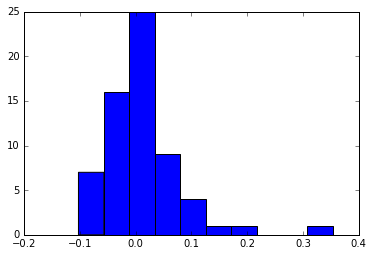

Distribution of X coefficients on training data:


In [26]:
print (clf_sgd.coef_)

plt.hist(clf_sgd.coef_)
plt.show()
print('Distribution of X coefficients on training data:')

In [27]:
clf_sgd = linear_model.SGDRegressor(loss='squared_loss', penalty='l1',  random_state=42)
train_and_evaluate(clf_sgd,X_train,y_train)

Coefficient of determination on training set: 0.733552826953
Average coefficient of determination using 10-fold cross validation: 0.705698975822


/Users/ianssmith/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ianssmith/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ianssmith/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ianssmith/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

In [28]:
from sklearn import svm
clf_svr = svm.SVR(kernel='linear')
train_and_evaluate(clf_svr, X_train, y_train)

/Users/ianssmith/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:216: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True).astype(np.float64)


Coefficient of determination on training set: 0.726593246535


/Users/ianssmith/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:216: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True).astype(np.float64)
/Users/ianssmith/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:216: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True).astype(np.float64)
/Users/ianssmith/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:216: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True).astype(np.float64)
/Users/ianssmith/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:216: DataConversionWarning: A column-vector y was pa

Average coefficient of determination using 10-fold cross validation: 0.700975692061


In [29]:
clf_svr_poly = svm.SVR(kernel='poly')
train_and_evaluate(clf_svr_poly, X_train, y_train)

/Users/ianssmith/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:216: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True).astype(np.float64)


Coefficient of determination on training set: 0.806702188326


/Users/ianssmith/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:216: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True).astype(np.float64)
/Users/ianssmith/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:216: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True).astype(np.float64)
/Users/ianssmith/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:216: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True).astype(np.float64)
/Users/ianssmith/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:216: DataConversionWarning: A column-vector y was pa

Average coefficient of determination using 10-fold cross validation: 0.551180755107


In [30]:
clf_svr_poly = svm.SVR(kernel='rbf')
train_and_evaluate(clf_svr_poly, X_train, y_train)

/Users/ianssmith/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:216: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True).astype(np.float64)


Coefficient of determination on training set: 0.794359426279


/Users/ianssmith/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:216: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True).astype(np.float64)
/Users/ianssmith/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:216: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True).astype(np.float64)
/Users/ianssmith/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:216: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True).astype(np.float64)
/Users/ianssmith/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:216: DataConversionWarning: A column-vector y was pa

Average coefficient of determination using 10-fold cross validation: 0.633990303791


In [31]:
from sklearn import ensemble
clf_et=ensemble.ExtraTreesRegressor(n_estimators=10, random_state=42)
train_and_evaluate(clf_et, X_train, y_train)

/Users/ianssmith/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


Coefficient of determination on training set: 0.99999999996


/Users/ianssmith/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ianssmith/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ianssmith/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ianssmith/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vec

Average coefficient of determination using 10-fold cross validation: 0.731962583458


In [32]:
regr = linear_model.LinearRegression()
train_and_evaluate(regr, X_train, y_train)

Coefficient of determination on training set: 0.737958047808
Average coefficient of determination using 10-fold cross validation: 0.708140592267


[[  1.12437716e-01  -6.76619800e-02  -6.62261251e-02  -3.74259286e-02
   -2.40096029e-02   2.79453029e-02  -1.12130551e-01  -2.79467666e-02
   -4.57010278e-02   1.14231944e-04  -1.45630945e-02  -1.92389200e-02
   -9.18458541e-02  -4.52054522e-02  -6.02893049e-02  -3.60815470e-03
   -2.76891693e-02  -1.37392981e-01  -4.16781236e-03  -1.92310446e-02
   -8.80986295e-03   1.69203425e-02  -6.75221304e-02  -1.38265365e-02
   -8.91936542e-02  -2.63490605e-02  -1.17553372e-02  -1.06762412e-01
    4.36320608e-02   9.84480079e-03   2.46967022e-02   5.72998278e-02
    3.76215015e-02   8.75204007e-02   1.40943143e-02   1.73080804e-02
    1.71468193e-02   5.44537913e-03   1.19656918e-01   9.88572797e-02
    1.96807454e-01  -8.38109503e-03   3.86230372e+11   3.86230372e+11
   -9.29688547e-02  -1.10764564e-01   3.90145162e-01   1.00733673e-01
   -4.95617079e-03   7.36114169e-03  -1.97502629e-03   1.71801159e-03
    4.55648007e-02   1.71253874e-01   8.83395806e-02   2.73004862e-02
   -1.48605162e-03  

/Users/ianssmith/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:5907: UserWarning: 2D hist input should be nsamples x nvariables;
 this looks transposed (shape is 1 x 64)
  '(shape is %d x %d)' % inp.shape[::-1])


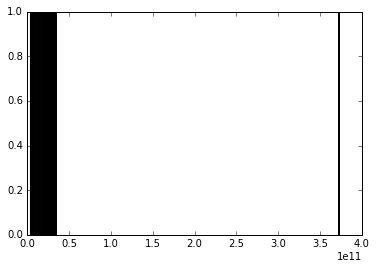

Distribution of X coefficients on training data:


In [33]:
print (regr.coef_)

plt.hist(regr.coef_)
plt.show()
print('Distribution of X coefficients on training data:')

In [42]:
from sklearn import metrics
def measure_performance(X, y, clf, show_r2_score=False):
    y_pred = clf.predict(X)
    if show_r2_score:
        print ("Coefficient of determination for test set:{0:.5f}".format(metrics.r2_score(y, y_pred)),"\n")
    
    

In [43]:
measure_performance(X_test, y_test, clf_et, show_r2_score=True)

Coefficient of determination for test set:0.68923 



In [44]:
measure_performance(X_test, y_test, clf_svr, show_r2_score=True)

Coefficient of determination for test set:0.59525 



In [45]:
measure_performance(X_test, y_test, clf_svr_poly, show_r2_score=True)

Coefficient of determination for test set:0.56226 



In [46]:
measure_performance(X_test, y_test, clf_sgd, show_r2_score=True)

Coefficient of determination for test set:0.61360 



Distribution of X coefficients on test data:


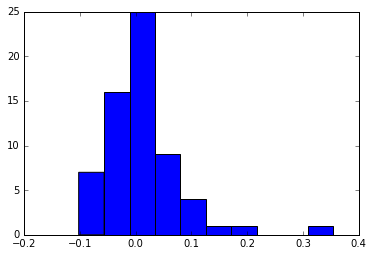

In [47]:
print('Distribution of X coefficients on test data:')
plt.hist(clf_sgd.coef_)
plt.show()

In [48]:
measure_performance(X_test, y_test, regr, show_r2_score=True)

Coefficient of determination for test set:0.61178 



Distribution of X coefficients on test data:


/Users/ianssmith/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:5907: UserWarning: 2D hist input should be nsamples x nvariables;
 this looks transposed (shape is 1 x 64)
  '(shape is %d x %d)' % inp.shape[::-1])


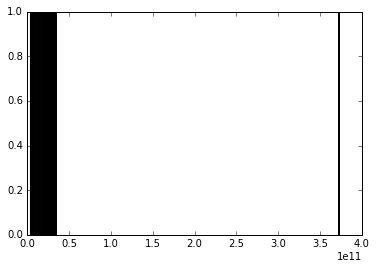

In [49]:
print('Distribution of X coefficients on test data:')
plt.hist(regr.coef_)
plt.show()